Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


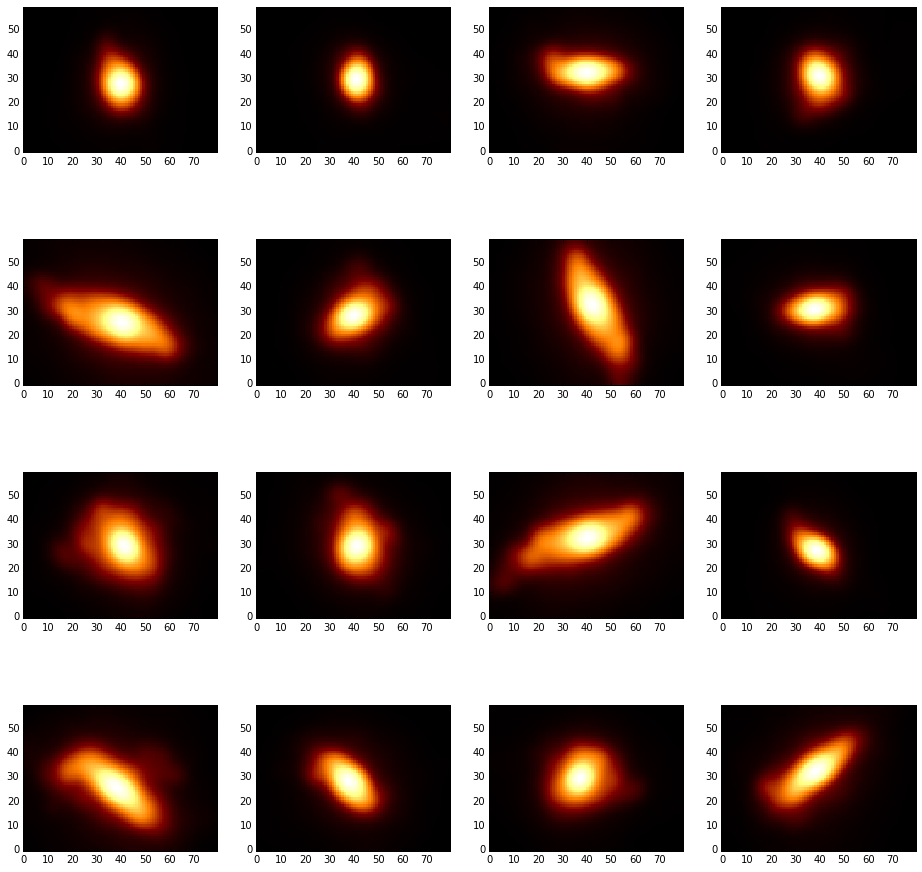

In [4]:
%pylab inline

import numpy
import astrohack_projections
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 16, 16
plot_kwargs = {"interpolation": "nearest",
          "cmap": "afmhot",
          "origin": "lower"}

file_path = "/Users/dalyabaron/Downloads/cutout_242959.hdf5"
illustris_gal = astrohack_projections.illustris_model_and_image(file_path)
illustris_gal.set_image_shape((60, 80))

for i in xrange(16):
    xi_hat, eta_hat = astrohack_projections.choose_random_projection()
    alpha, beta, gamma = numpy.random.uniform(0.0, 360.0, 3)
    intensity = 1 
    scale = 0.015 * numpy.exp(numpy.random.uniform())
    xshift = numpy.random.uniform(29., 31.)
    yshift = numpy.random.uniform(39., 41.)
    psf_size = 3
    bg = 0.
    
    kwargs = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'intensity':intensity, 'scale':scale, 'xshift': xshift, 'yshift': yshift, 'bg':0.0, 'psf_size':psf_size}
    illustris_gal.set_image_parameters(**kwargs)
    illustris_gal.construct_image()
    
    plt.subplot(4, 4, i+1)
    a, mid = numpy.percentile(illustris_gal.get_image(), [15., 85.])
    ran = mid - a
    vmin = mid - 5. * ran
    vmax = mid + 20. * ran
    plt.imshow(numpy.log10(illustris_gal.get_image()+1), **plot_kwargs)

In [16]:
# create an album of 32 such objects with random projection + normaly distributed noise

# plot parameters
plt.rcParams['figure.figsize'] = 16, 16
plot_kwargs = {"interpolation": "nearest",
          "cmap": "afmhot",
          "origin": "lower"}

# initial galaxy data
file_path = "./illustris_galaxies/cutout_242959.hdf5"
illustris_gal = astrohack_projections.illustris_model_and_image(file_path)
illustris_gal.set_image_shape((40, 50))

# album and PSF initialisation
album = astrohack_projections.album_and_model()
psf = astrohack_projections.mixture_of_gaussians(2)
psf.add_gaussian(1., numpy.array([0., 0.]), numpy.eye(2)*1.)

# galaxy model I fit with
basevar = 0.5 * numpy.eye(3)
gal_model = astrohack_projections.galaxy_model_3d()
v = [3., 0., 0.]
gal_model.add_gaussian(1.0, numpy.array([0., -1., 0.]), basevar + numpy.outer(v,v))
v = [-1., 3., 0.]
gal_model.add_gaussian(1.0, numpy.array([2., 1., 0.]), basevar + numpy.outer(v,v))
v = [1., 3., 0.]
gal_model.add_gaussian(1.0, numpy.array([-2., 1., 0.]), basevar + numpy.outer(v,v))

for i in xrange(32):
    # projection parameters
    xi_hat, eta_hat = astrohack_projections.choose_random_projection()
    alpha, beta, gamma = numpy.random.uniform(0.0, 360.0, 3)
    intensity = 10
    scale = 0.02 * numpy.exp(numpy.random.uniform())
    xshift = numpy.random.uniform(19.5, 21.)
    yshift = numpy.random.uniform(24.5, 26.)
    psf_size = 2
    bg = 0.
    # illustris galaxy
    kwargs = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'intensity':intensity, 'scale':scale, 'xshift': xshift, 'yshift': yshift, 'bg':0.0, 'psf_size':psf_size}
    illustris_gal.set_image_parameters(**kwargs)
    illustris_gal.construct_image(xi_hat, eta_hat)
    # image
    image = astrohack_projections.image_and_model()
    image.set_shape((40, 50))
    image.set_psf(psf)
    kwargs = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'intensity':intensity, 'scale':scale, 'xshift': xshift, 'yshift': yshift, 'bg':0.0}
    image.set_parameters(**kwargs)
    image.set_galaxy(gal_model)
    image.set_ivar(numpy.ones(image.get_shape()))
    image.set_data(illustris_gal.get_image() + numpy.random.normal(size=image.get_shape())/ numpy.sqrt(image.ivar))
    # album
    album.add_image(image)
    
print len(album)

32


/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt


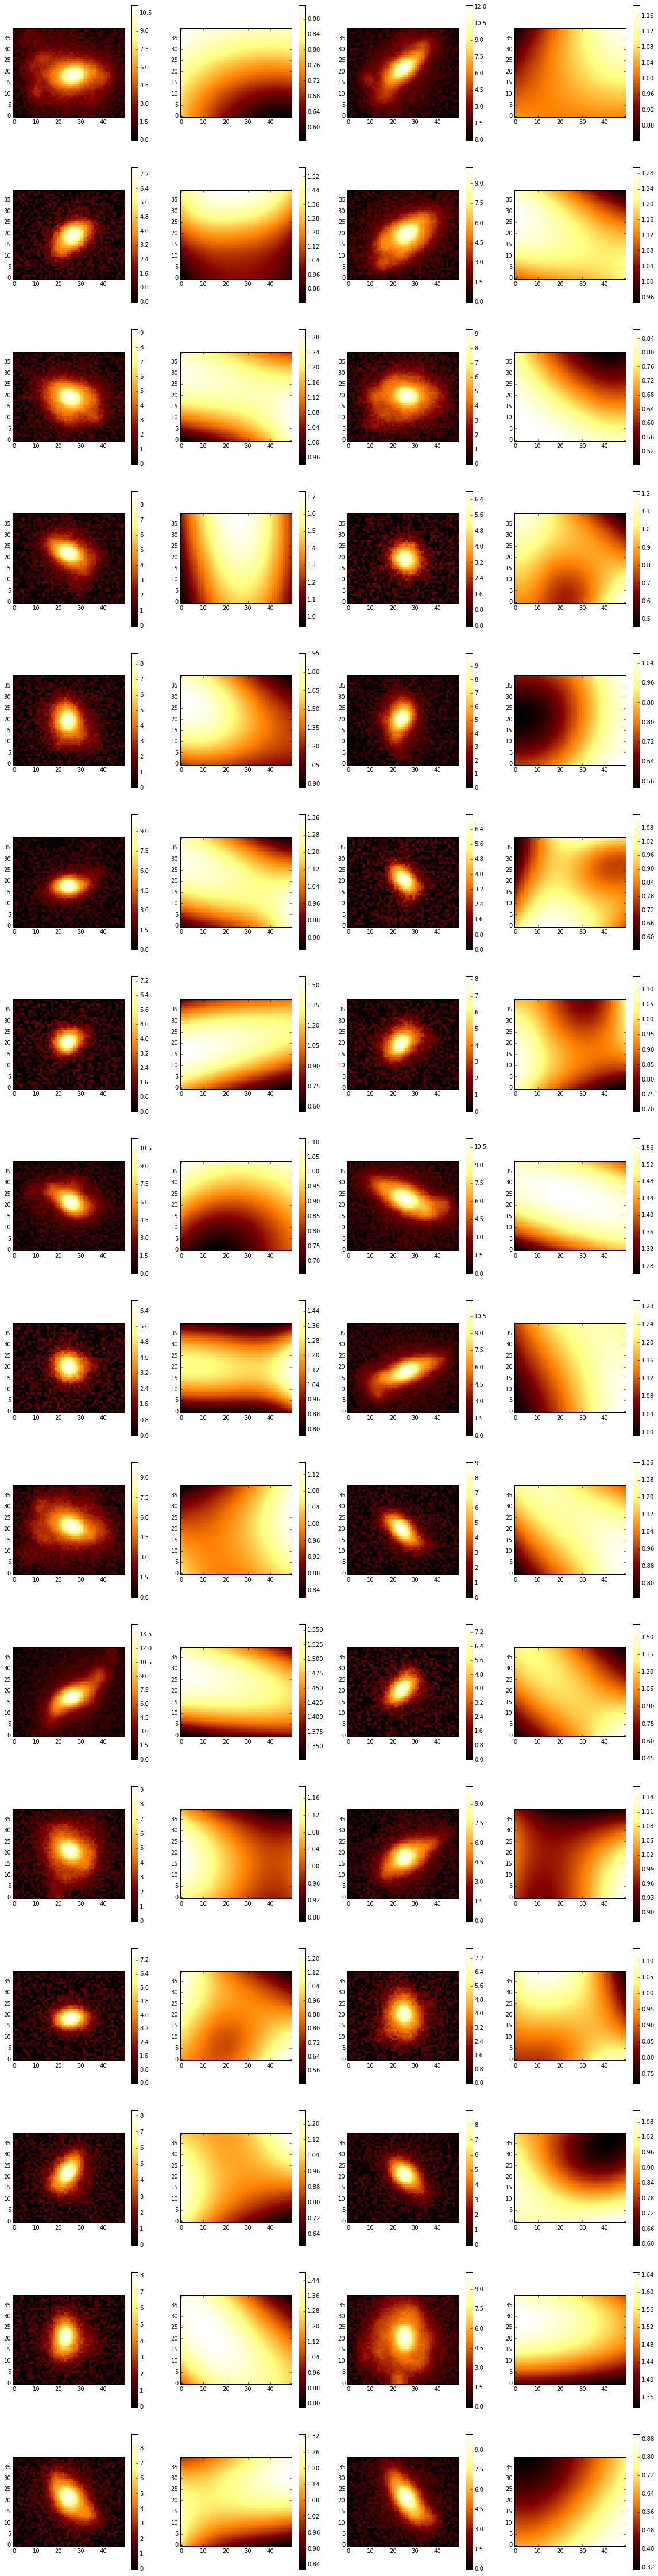

In [18]:
def showme(album):
    plt.rcParams['figure.figsize'] = 20, 80
    plot_kwargs = {"interpolation": "nearest",
          "cmap": "afmhot",
          "origin": "lower"}
    for i in xrange(len(album)):
        image = album.get_all_images()[i]
        plt.subplot(16, 4, 2*i+1)
        vmin = -5. / numpy.sqrt(numpy.median(image.get_ivar())) # assumes bg = 0
        vmax = -2. * vmin # assumes bg = 0
        plt.imshow(numpy.nan_to_num(numpy.sqrt(image.get_data())), **plot_kwargs)
        plt.colorbar()
        plt.subplot(16, 4, 2*i+2)
        plt.imshow(numpy.nan_to_num(numpy.sqrt(image.get_synthetic())), **plot_kwargs)
        plt.colorbar()
        
showme(album)

album before 11265289.6704
image before 731268.02729
image before 875263.74083
image before 122018.790673
image before 628327.782163
image before 354329.421535
image before 387454.117535
image before 221085.449447
image before 68563.5844979
image before 195639.649189
image before 308906.445395
image before 281204.570078
image before 73359.1791183
image before 78347.5562526
image before 139698.799606
image before 521498.108449
image before 876464.429572
image before 73374.549868
image before 860954.978775
image before 510891.034279
image before 196074.310445
image before 1546927.27417
image before 99028.6961817
image before 308815.067122
image before 472093.296298
image before 107442.633193
image before 137062.763835
image before 157080.541917
image before 191537.804309
image before 153766.372239
image before 693288.406218
image before 277583.935414
image before 493158.80221


/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt


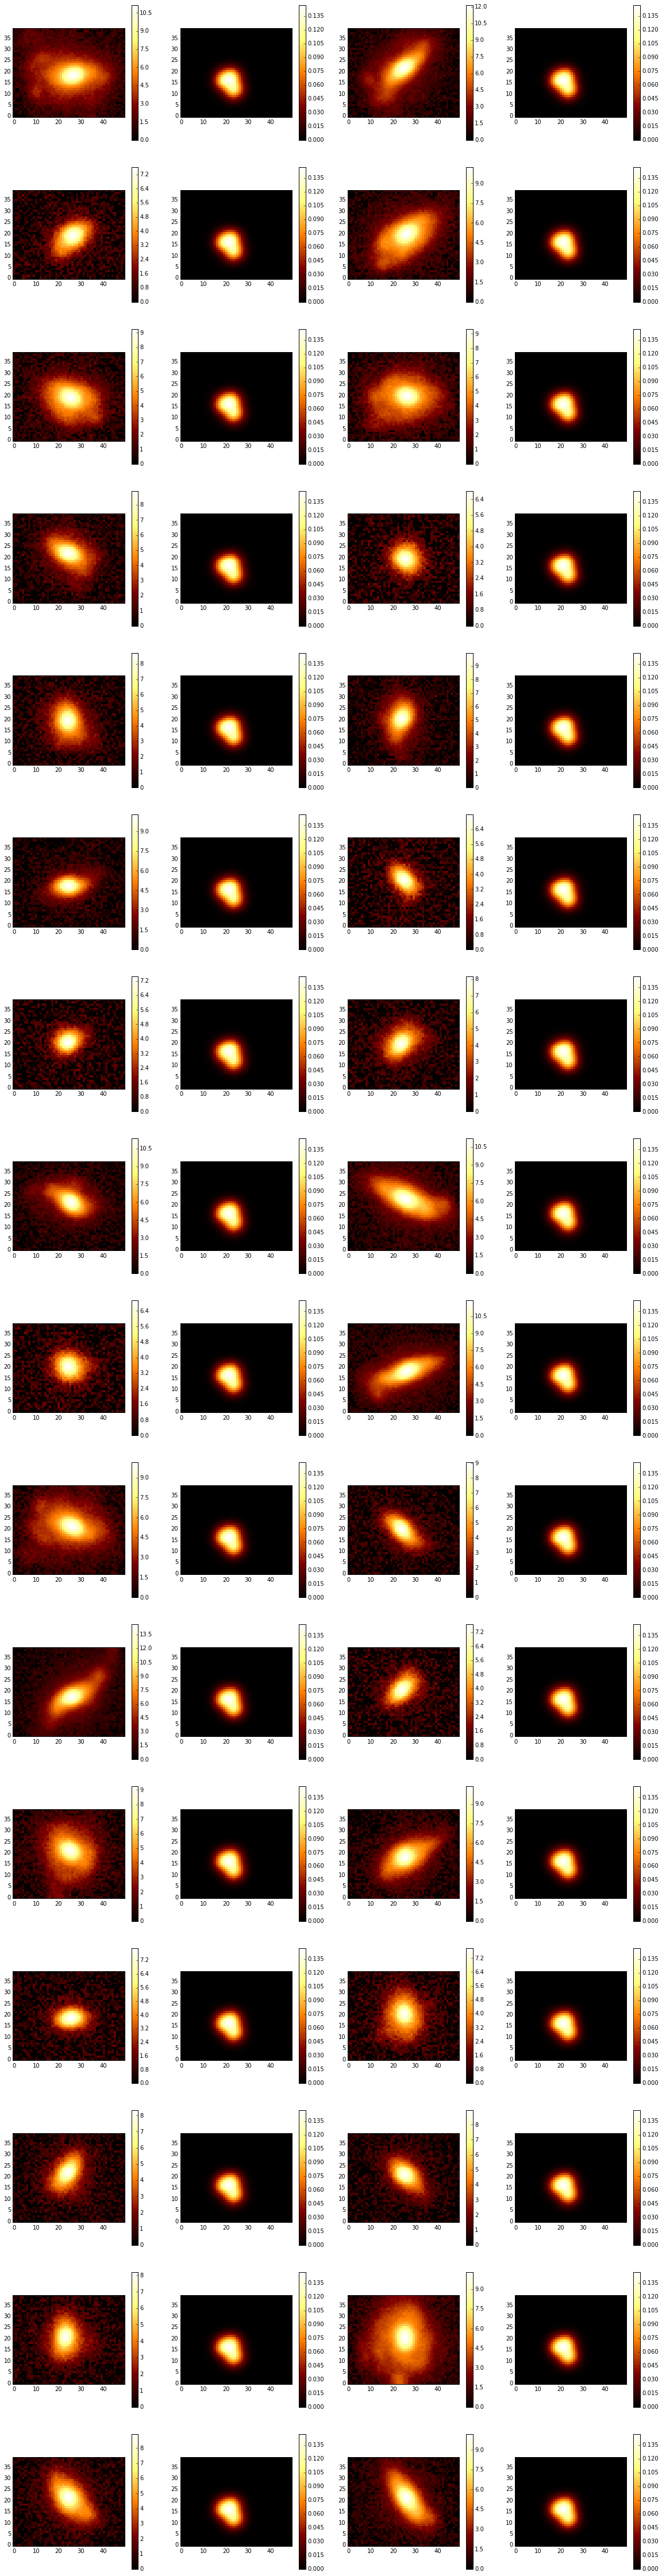

In [19]:
# INITIALIZATION BLOCK!
import scipy.optimize as op

galpar0 = numpy.array([1., 2., 0., 0., 1., 1., 1., 0., 0., 0.,
                       1., 0., 2., 0., 1., 1., 1., 0., 0., 0.,
                       1., 0., 0., 2., 1., 1., 1., 0., 0., 0.])
imgpar0 = (10., 30., 30., 0.1, 0.5, 14., 20., 0.)

print "album before", album(galpar0)
for image in album:
    print "image before", image(imgpar0)
    
showme(album)
plt.savefig("./fitting_pngs/illustris_242959/initialisation.pdf")

In [21]:
# run the thing!
num_runs = 8

for i in xrange(num_runs):
    # album optimisation
    galpar0 = album.galaxy.get_parameters_vector()
    print "album before", album(galpar0)
    result = op.minimize(album, galpar0, method="Powell")
    galpar = result['x']
    print "album after", album(galpar)
    
    showme(album)
    plt.savefig("./fitting_pngs/illustris_242959/run_%s_album.pdf" % str(2*i).zfill(2))
    plt.close()
    
    # image optimisation
    for image in album:
        imgpar0 = image.get_parameters_vector()
        print "image before", image(imgpar0)
        result = op.minimize(image, imgpar0)
        imgpar = result['x']
        print "image after", image(imgpar)

    showme(album)
    plt.savefig("./fitting_pngs/illustris_242959/run_%s_image.pdf" % str(2*i+1).zfill(2))
    plt.close()

album before 221374.496803
album after

/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt
/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in sqrt


 199289.753204
image before 11836.6433701
image after 11030.2865116
image before 8480.50399418
image after 8170.87344649
image before 2926.55879977
image after 2667.79848364
image before 7903.58352646
image after 7433.39220965
image before 6565.43902772
image after 4955.33176689
image before 6967.57881201
image after 6345.2062396
image before 3549.29147885
image after 2653.68746202
image before 3294.13982287
image after 3022.49652993
image before 3850.27795552
image after 2945.32823672
image before 4802.58419632
image after 3728.6684346
image before 5449.60304998
image after 3550.54290239
image before 2398.43155025
image after 2218.44639334
image before 3217.56997085
image after 2994.09024961
image before 3545.28120759
image after 3298.61532934
image before 6555.86006721
image after 5342.51681574
image before 12705.0763823
image after 11460.339014
image before 3233.3737279
image after 2763.29920271
image before 16985.5148855
image after 15227.3422226
image before 9927.0510878
image aft

/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/scipy/optimize/optimize.py:891: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


In [23]:
# look at the galaxy model now
print type(album.galaxy)
print album.galaxy.get_parameters_vector()

<class 'astrohack_projections.galaxy_model_3d'>
[  4.10481932e+03   4.01760543e+00   2.67301469e-01   1.76902072e-01
   1.29078693e+00   1.44596773e+00   9.06668103e-01  -2.83910741e-01
  -1.86344931e-01  -3.92240603e-02   1.44869058e+04   2.90224782e+00
   1.21861053e+00   2.02405823e-01   2.29896687e+01   1.58912702e+01
   3.98331748e+00   3.25830937e+00  -3.95245027e+00  -1.26450159e+00
   7.36137851e+03   4.82590327e+00  -5.28186566e-01   9.59197895e-02
   1.04456963e+01   9.22751847e+00   1.45635504e+00  -3.12721237e+00
  -1.53549285e+00  -1.28143090e+00]
